# 🚨 Network Traffic Anomaly Detection (UNSW-NB15)

This notebook demonstrates anomaly detection on the **UNSW-NB15 (2015)** dataset.

### Objectives:
- Load and explore the UNSW-NB15 dataset
- Preprocess categorical and numerical features
- Train a **RandomForestClassifier** for anomaly detection
- Evaluate performance with classification metrics
- Make predictions on new data samples


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib


## 📥 Load Dataset

In [2]:
train_path = 'C:\\Users\\KIIT0001\\OneDrive\\Documents\\network-anomaly-detector\\data\\UNSW_NB15_training-set.csv'
test_path = 'C:\\Users\\KIIT0001\\OneDrive\\Documents\\network-anomaly-detector\\data\\UNSW_NB15_testing-set.csv'

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

df_train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


## 🔍 Exploratory Data Analysis

Training set shape: (175341, 45)
Testing set shape: (82332, 45)


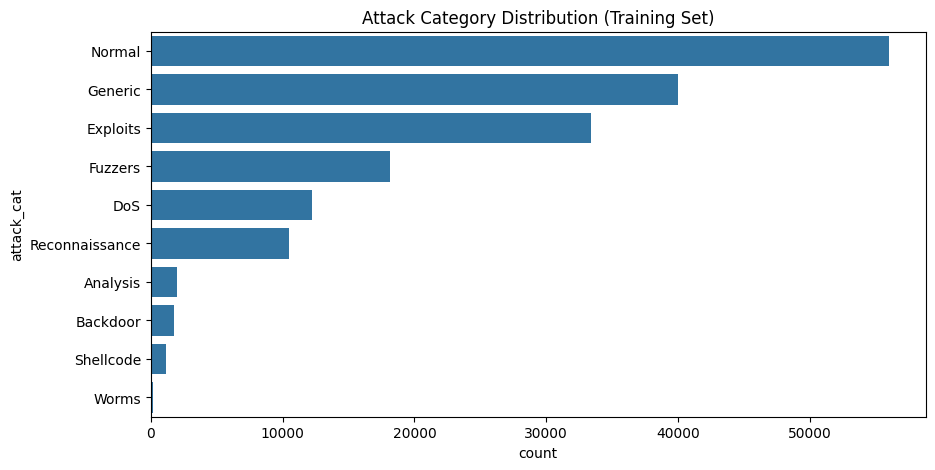

In [16]:
print('Training set shape:', df_train.shape)
print('Testing set shape:', df_test.shape)

# Attack categories distribution
plt.figure(figsize=(10,5))
sns.countplot(y=df_train['attack_cat'], order=df_train['attack_cat'].value_counts().index)
plt.title('Attack Category Distribution (Training Set)')
plt.show()

## ⚙️ Preprocessing

In [3]:
# Split features and labels
X_train = df_train.drop(columns=['attack_cat','label'])
y_train = df_train['attack_cat']

X_test = df_test.drop(columns=['attack_cat','label'])
y_test = df_test['attack_cat']

# Encode categorical features
label_encoders = {}
for col in X_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    label_encoders[col] = le
    
    # Handle unseen categories in test set
    X_test[col] = X_test[col].apply(lambda x: x if x in le.classes_ else None)
    X_test[col] = le.transform(X_test[col].fillna(le.classes_[0]))

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 🤖 Train Model

In [5]:
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

model.fit(X_train, y_train)

# Save model & scaler
joblib.dump((model, scaler), 'C:\\Users\\KIIT0001\\OneDrive\\Documents\\network-anomaly-detector\\models\\anomaly_model.pkl')
print('✅ Model trained and saved.')

MemoryError: could not allocate 5242880 bytes

## 📊 Evaluate Model

In [2]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

NameError: name 'model' is not defined

## 🔮 Predict on New Data

In [1]:
sample = df_test.drop(columns=['attack_cat','label']).iloc[[0]]

# Encode categorical features
for col in sample.select_dtypes(include='object').columns:
    sample[col] = sample[col].astype('category').cat.codes

sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)[0]
print('✅ Prediction:', prediction)

NameError: name 'df_test' is not defined